<a href="https://colab.research.google.com/github/Ipal23/A-node-is-any-instance-of-Ethereum-client-software-that-is-connected-to-other-computers-also-runni/blob/main/A_B_Test_that_works.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values:
 Group        0
Converted    0
dtype: int64
Number of duplicate entries: 1996
Conversion Rate A: 0.50
Conversion Rate B: 0.50
Z-statistic: 0.00, P-value: 1.0000
Fail to reject the null hypothesis - no significant difference between groups.


<ipython-input-1-ded1011b8954>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group', y='Converted', data=data.groupby('Group').mean().reset_index(), palette='viridis')


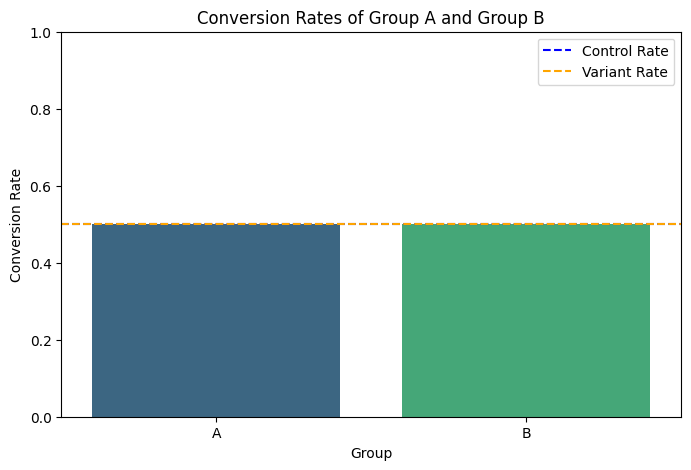

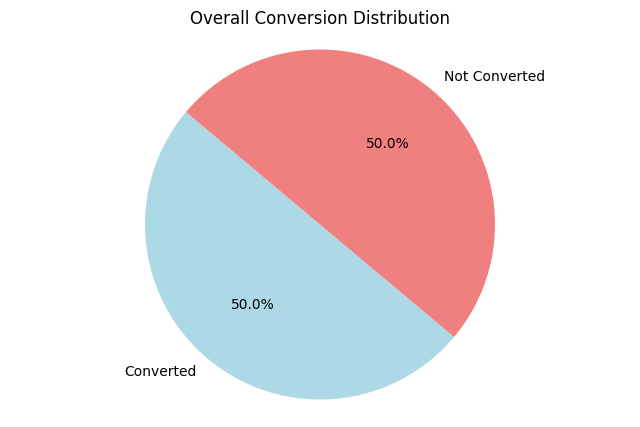

In [1]:
# Install necessary libraries
!pip install numpy pandas scipy matplotlib seaborn statsmodels

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

# Step 1: Simulate Data
np.random.seed(42)

# Simulate user data for Group A (Control)
n_A = 1000  # Number of users in Group A
conversion_rate_A = 0.1  # 10% conversion rate
A_transactions = np.random.binomial(1, conversion_rate_A, n_A)

# Simulate user data for Group B (Variant)
n_B = 1000  # Number of users in Group B
conversion_rate_B = 0.12  # 12% conversion rate
B_transactions = np.random.binomial(1, conversion_rate_B, n_B)

# Combine data into a DataFrame for easier manipulation
data = pd.DataFrame({
    'Group': ['A'] * n_A + ['B'] * n_B,
    'Converted': np.concatenate([A_transactions, B_transactions])
})

# Step 2: Data Cleaning

# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Check for duplicates
duplicates = data[data.duplicated()]
print(f"Number of duplicate entries: {len(duplicates)}")

# Remove duplicates if any
data.drop_duplicates(inplace=True)

# Step 3: Perform A/B Test Analysis

# Calculate conversion rates
conversion_A = data[data['Group'] == 'A']['Converted'].mean()
conversion_B = data[data['Group'] == 'B']['Converted'].mean()

print(f"Conversion Rate A: {conversion_A:.2f}")
print(f"Conversion Rate B: {conversion_B:.2f}")

# Perform two-proportion z-test using statsmodels
count_A = np.sum(data[data['Group'] == 'A']['Converted'])
count_B = np.sum(data[data['Group'] == 'B']['Converted'])

success_counts = np.array([count_A, count_B])
total_counts = np.array([n_A, n_B])

z_stat, p_value = proportions_ztest(success_counts, total_counts)
print(f"Z-statistic: {z_stat:.2f}, P-value: {p_value:.4f}")

# Analyze results based on p-value
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis - significant difference between groups.")
else:
    print("Fail to reject the null hypothesis - no significant difference between groups.")

# Step 4: Data Visualization

# Bar chart for conversion rates
plt.figure(figsize=(8, 5))
sns.barplot(x='Group', y='Converted', data=data.groupby('Group').mean().reset_index(), palette='viridis')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rates of Group A and Group B')
plt.ylim(0, 1)
plt.axhline(y=conversion_A, color='blue', linestyle='--', label='Control Rate')
plt.axhline(y=conversion_B, color='orange', linestyle='--', label='Variant Rate')
plt.legend()
plt.show()

# Pie chart for distribution of conversions
labels = ['Converted', 'Not Converted']
sizes = [count_A + count_B, len(data) - (count_A + count_B)]
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(8, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Overall Conversion Distribution')
plt.show()